In [4]:
import json
import sys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests
from keys import client_id, api_key

In [5]:
## style for notebook & plots - in matplotlib bookmark ##
style = 'dark_background'
plt.style.use(style)

In [6]:
indian_dc = pd.read_csv(r'/Users/Chaz/Documents/Flatiron/Repository/flatiron-phase1-yelp/test_runs/test_data_dc.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state', 'zip_code'])
indian_dc.head(10)

,business_id,name,categories,num_categories,price,review_count,rating,street_address,city,state,zip_code
0,n-6O6I7pmmpwkW2pCO-zDw,Indigo,[indpak],1,2,879,4.5,243 K St NE,"Washington, DC",DC,20002.0
1,CwdlygqT4cWwOtQGsYdoBw,Rasika,[indpak],1,3,3127,4.5,633 D St NW,"Washington, DC",DC,20004.0
2,jxTABk0jP7Y_kN3DCNiWbQ,Bombay Street Food,[indpak],1,2,389,4.0,1413 Park Rd NW,"Washington, DC",DC,20010.0
3,jj1vSlzf-G1_vTJJ6ftsAA,Pappe,[indpak],1,2,305,4.0,1317 14th St NW,"Washington, DC",DC,20005.0
4,0CfNGIodfKdoItAmSWgDDg,RASA,[indpak],1,2,412,4.5,1247 First St SE,"Washington, DC",DC,20003.0
5,A3bc3FwtS5u_ISZt6mnGhQ,Butter Chicken Company 2,[indpak],1,0,54,4.5,500 H St NE,"Washington, DC",DC,20002.0
6,JWDgIoAfVCr97wl7AQxVvg,Spice 6 Modern Indian,[indpak],1,2,310,4.5,740 6th St NW,"Washington, DC",DC,20001.0
7,wRHR4iAYaqnDzMA7pgK2bA,Punjab Grill,"[indpak, cocktailbars, vegetarian]",3,0,334,4.5,427 11th St NW,"Washington, DC",DC,20004.0
8,lpPCrVVMQ6X8mvId_E_BGw,Karma Modern Indian,"[indpak, tapasmallplates, cocktailbars]",3,3,301,4.5,611 I St NW,"Washington, DC",DC,20001.0
9,TgLix14aFIt4TZWNXtILdA,Bombay Street Food #2,[indpak],1,2,166,4.0,524 8th St SE,"Washington, DC",DC,20003.0


In [7]:
indian_la = pd.read_csv('/Users/Chaz/Documents/Flatiron/Repository/flatiron-phase1-yelp/test_runs/test_data_la.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state', 'zip_code'])
indian_la.head(10)

,business_id,name,categories,num_categories,price,review_count,rating,street_address,city,state,zip_code
0,3XTjerBg_PywBN81Ts45Bg,India's Restaurant,"[indpak, halal, seafood]",3,2,2951,4.5,4366 Fountain Ave,Los Angeles,CA,90029
1,uteG6HIb4an-y5fFCXWo7w,Anarkali Indian Restaurant,[indpak],1,2,2974,4.5,7013 Melrose Ave,Los Angeles,CA,90038
2,52QPoJFEObNp6f6rv8XthQ,India's Tandoori,"[indpak, gluten_free, vegan]",3,2,1192,4.0,11819 Wilshire Blvd,Los Angeles,CA,90025
3,B6fT0KdNWPKH9Yjaz06NiA,Biriyani Kabob House,"[pakistani, halal, indpak]",3,2,908,4.5,3525 W 3rd St,Los Angeles,CA,90020
4,2Z7pKTwHhFwuH-aTCgd-Rg,India's Tandoori,"[indpak, halal, seafood]",3,2,1463,4.0,5468 Wilshire Blvd,Los Angeles,CA,90036
5,tEK23PiHNXBHzu8994jurg,India's Tandoori Hollywood,"[indpak, halal, seafood]",3,2,422,4.5,7300 Sunset Blvd,Los Angeles,CA,90046
6,7pKS39Tdt0c1hAhdxOWZqA,House of Curry,"[indpak, halal, himalayan]",3,2,230,4.0,1888 S Western Ave,Los Angeles,CA,90006
7,EB-RtApkwptE3wRCQO8bCw,Badmaash - Downtown LA,"[indpak, newamerican]",2,2,1841,4.0,108 W 2nd St,Los Angeles,CA,90012
8,0zxyLKLp408CevWUpf5ziQ,Chef Arango Indian Restaurant,"[indpak, halal]",2,0,42,5.0,4506 W Pico Blvd,Los Angeles,CA,90019
9,j3zbQyVS9C9SwzZGzAGAgg,Cardamom Indian Cuisine,"[indpak, halal, vegetarian]",3,2,916,4.5,7233 Beverly Blvd,Los Angeles,CA,90036


In [8]:
indian_ny = pd.read_csv('/Users/Chaz/Documents/Flatiron/Repository/flatiron-phase1-yelp/data/indian_ny.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
indian_ny.head(10)

,business_id,name,categories,num_categories,price,review_count,rating,street_address,city,state
0,lnI9toC-uAhBIbtHDMxvcA,Indika House,"[indpak, asianfusion]",2,2,74,5.0,943 Broadway,Brooklyn,NY
1,ZqOxAKVZEZTa4XS4zthp3Q,Bombay Grill,[indpak],1,2,206,4.5,1176 Bedford Ave,Brooklyn,NY
2,dGE1Imqoz1vdHa2cjfvO1w,Gandhi Fine Indian Cuisine,[indpak],1,2,365,4.0,2032 Bedford Ave,Brooklyn,NY
3,YDtIHtfvWd4W36wq6UAjoA,Kitchen Grill Indian Restaurant,[indpak],1,2,272,4.5,914A Fulton St,Brooklyn,NY
4,HY7Hx-z5lq1vAacDwYBfoA,Diwan Grill Indian Cuisine,"[indpak, desserts, pakistani]",3,2,98,4.5,678 Franklin Ave,Brooklyn,NY
5,maXkjUEZGWrKF7BFrrUUXQ,King of Tandoor,"[indpak, halal]",2,2,260,4.0,600 Flatbush Ave,Brooklyn,NY
6,EKY8DwZVWpkgv6IWrepbWg,Namaste,"[indpak, halal, buffets]",3,2,214,4.0,195 5th Ave,Brooklyn,NY
7,BXoW0AUDE7WZJcY-Vhqlbg,Indian Table,[indpak],1,2,118,4.5,234 Court St,Brooklyn,NY
8,LC5qKRk3zy7f1eTONkSd3A,Dhania Fine Indian Cuisine,[indpak],1,2,14,4.0,787 Prospect Pl,Brooklyn,NY
9,MtZaEGCm6zdAV8W4TWlerQ,Masti Indian Grill & Chatt Bar,[indpak],1,0,44,4.5,184 Havemeyer St,New York,NY


In [9]:
indian_chi = pd.read_csv('/Users/Chaz/Documents/Flatiron/Repository/flatiron-phase1-yelp/data/indian_chi.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
indian_chi.head(10)

,business_id,name,categories,num_categories,price,review_count,rating,street_address,city,state
0,WM2JQP4yzQHPbIh-wNdK6g,Cumin,"[indpak, himalayan]",2,2,929,4.0,1414 N Milwaukee Ave,Chicago,IL
1,1GiybV2faVpTt1zw13CzLA,Rangoli,[indpak],1,2,649,4.0,2421 W North Ave,Chicago,IL
2,2J0wXaUS701x3WvzBiPBDQ,The Spice Room,[indpak],1,2,300,4.0,2906 W Armitage Ave,Chicago,IL
3,sYzkzjM2upp2vW32vPaJ9w,Ghareeb Nawaz,"[indpak, pakistani]",2,1,875,4.0,2032 W Devon Ave,Chicago,IL
4,K3xR2sskPP-KeDmlwnx-FQ,Adda Indian Cuisine,[indpak],1,0,27,4.5,1400 W Taylor St,Chicago,IL
5,X1X_1cPqu8RiPmjOXWeyTQ,Mild 2 Spicy,[indpak],1,2,320,4.5,714 W Diversey Pkwy,Chicago,IL
6,vx8FYc1aKtf8TyhH8-qipA,Tandoor Char House,"[indpak, pakistani, halal]",3,2,843,4.0,2652 N Halsted St,Chicago,IL
7,z4TGXEUnoLTdoprvSq8bng,Namaste Chicago,"[indpak, himalayan]",2,2,48,4.5,2515 N California Ave,Chicago,IL
8,dLS8GPg-K1O-zJ3VJAtiyg,India House Restaurant - Chicago,"[indpak, buffets, desserts]",3,2,1384,3.5,59 W Grand Ave,Chicago,IL
9,Bux2liRQch80CZErQiE5ew,Vajra,"[himalayan, indpak]",2,3,158,4.5,1329 W Chicago Ave,Chicago,IL


In [10]:
indian_mia = pd.read_csv('/Users/Chaz/Documents/Flatiron/Repository/flatiron-phase1-yelp/data/indian_mia.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
indian_mia.head(10)

,business_id,name,categories,num_categories,price,review_count,rating,street_address,city,state
0,V3btCvWa1flTBYt2YKea_g,Bombay Darbar,[indpak],1,2,1097,4.5,2901 Florida Ave,Miami,FL
1,D2cs6y2Nsee3pAxoyAAAVg,Urban Rasoi - Kendall,[indpak],1,2,141,5.0,13720 SW 88th St,Miami,FL
2,0Xlb9ZjXJa1I1Yxi1QTnVA,"Ashoka Indian Restaurant, Miami","[indpak, seafood, desserts]",3,2,324,4.5,295 NW 82nd Ave,Miami,FL
3,krKmADOKM1KjVm4F0rL8lQ,Ghee Indian Kitchen,[indpak],1,2,528,4.5,8965 SW 72nd Pl,Miami,FL
4,SluxdI59bMwsSx_RBMZucA,Spice Magic Indian Cuisine,[indpak],1,2,29,4.5,10720 W Flagler St,Miami,FL
5,bAFvhHeVNd8MRM0M4wsqwA,Punjab Indian Cafe,[indpak],1,2,137,4.5,7950 SW 8th St,Miami,FL
6,-lvidcaRhl89pU8hCByCJA,Spice N Curry,"[indpak, grocery]",2,1,128,4.5,123 SW 107th Ave,Miami,FL
7,5194FXoDTKX-XSfd0389ng,Ayesha Fine Dining,[indpak],1,2,236,4.0,14151 S Dixie Hwy,Miami,FL
8,NtBdy9oTCc_wqGXionh2IA,Namaste Miami,[indpak],1,0,42,5.0,221 Navarre Ave Coral Gables,Miami,FL
9,Wz609_VP2yMDY0Zlbzggiw,Swagat Indian Kitchen,[indpak],1,2,124,4.5,900 Biscayne Blvd,Miami,FL


In [11]:
indian_sj = pd.read_csv('/Users/Chaz/Documents/Flatiron/Repository/flatiron-phase1-yelp/data/indian_sj.csv', converters={'categories': eval}, header=None,
                        names=['business_id', 'name', 'categories', 'num_categories', 'price', 'review_count', 'rating', 'street_address', 'city', 'state'])
indian_sj.head(10)  

,business_id,name,categories,num_categories,price,review_count,rating,street_address,city,state
0,ix6wIYOKgQNLr8Nf4SDc6w,Swaad Indian Cuisine,[indpak],1,2,682,4.0,498 N 13th St,San Jose,CA
1,fuQOU_6-sjCuitcCvtYOvw,Punjab Cafe,[indpak],1,2,1039,4.0,322 E Santa Clara St,San Jose,CA
2,xW0PxJjvykdpUn3iLdjyEw,Everest Cuisine - San Jose,"[indpak, himalayan]",2,0,4,5.0,2092 Concourse Dr,San Jose,CA
3,9so8PQIG3Q-6mXQg5756CQ,Sam and Curry,[indpak],1,0,10,5.0,1751 N 1st St,San Jose,CA
4,DSKKwbvVmsrgUyKb53Aggg,Puranpoli,"[vegetarian, indpak]",2,0,544,5.0,3074B Scott Blvd,Santa Clara,CA
5,lqX4Y44HufHN86aKKlZjcQ,Karimi Restaurant,"[indpak, halal, pakistani]",3,2,372,4.5,1086 N 1st St,San Jose,CA
6,4y7iDnEY30VDIjUx4NvNiA,Mehak Of India,[indpak],1,2,351,4.0,311 N Capitol Ave,San Jose,CA
7,TZ8RP4fC8hYtHtUbvx1_rA,Curry On,[indpak],1,2,230,4.5,241 E Santa Clara St,San Jose,CA
8,gSG0U7zwZGAoo4LC-BiBIQ,Vantillu Vizag,"[indpak, vegetarian]",2,0,8,5.0,1201 E Julian St,San Jose,CA
9,YIzrlmqLR_ebL6uF6y6nZw,Naan & Curry,"[indpak, halal, wraps]",3,2,493,4.0,375 Saratoga Ave,San Jose,CA


In [12]:
indian_dc.describe()

,num_categories,price,review_count,rating,zip_code
count,386.000000,386.000000,386.000000,386.000000,384.000000
mean,2.124352,1.440415,220.448187,3.869171,21026.833333
std,0.831258,0.842275,290.544520,0.644947,866.744986
min,1.000000,0.000000,1.000000,1.000000,20001.000000
25%,1.000000,1.000000,52.250000,3.500000,20024.000000
50%,2.000000,2.000000,153.000000,4.000000,20876.500000
75%,3.000000,2.000000,288.750000,4.500000,22041.000000
max,3.000000,4.000000,3127.000000,5.000000,22315.000000


In [13]:
indian_dc.groupby('rating').describe()

num_categories                                                 price  \
                count      mean       std  min   25%  50%   75%  max  count   
rating                                                                        
1.0               2.0  1.500000  0.707107  1.0  1.25  1.5  1.75  2.0    2.0   
1.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0    1.0   
2.0               6.0  2.166667  0.408248  2.0  2.00  2.0  2.00  3.0    6.0   
2.5               6.0  1.833333  0.752773  1.0  1.25  2.0  2.00  3.0    6.0   
3.0              36.0  2.305556  0.821825  1.0  2.00  3.0  3.00  3.0   36.0   
3.5             101.0  2.029703  0.830126  1.0  1.00  2.0  3.00  3.0  101.0   
4.0             125.0  2.144000  0.849136  1.0  1.00  2.0  3.00  3.0  125.0   
4.5              87.0  2.126437  0.832544  1.0  1.00  2.0  3.00  3.0   87.0   
5.0              22.0  2.272727  0.882735  1.0  1.25  3.0  3.00  3.0   22.0   

                  ... review_count         zip_code                            \
            mean  ...          75%     max    count          mean         std   
rating            ...                                                           
1.0     0.000000  ...         1.75     2.0      2.0  20206.500000  287.792460   
1.5     1.000000  ...        53.00    53.0      1.0  20410.000000         NaN   
2.0     0.500000  ...         9.00    19.0      5.0  20011.000000   11.916375   
2.5     1.500000  ...        42.25   393.0      6.0  21070.333333  998.499007   
3.0     1.388889  ...       180.25   423.0     35.0  21177.771429  929.317019   
3.5     1.524752  ...       250.00   708.0    101.0  20933.782178  848.524845   
4.0     1.672000  ...       389.00  1897.0    125.0  21135.904000  849.963931   
4.5     1.436782  ...       330.50  3127.0     87.0  21006.436782  890.749811   
5.0     0.227273  ...        56.50   488.0     22.0  20996.454545  797.785908   

                                                       
            min       25%      50%       75%      max  
rating                                                 
1.0     20003.0  20104.75  20206.5  20308.25  20410.0  
1.5     20410.0  20410.00  20410.0  20410.00  20410.0  
2.0     20001.0  20002.00  20004.0  20024.00  20024.0  
2.5     20001.0  20196.75  21006.0  21883.50  22306.0  
3.0     20001.0  20021.50  21076.0  22090.50  22207.0  
3.5     20001.0  20170.00  20850.0  22030.00  22312.0  
4.0     20001.0  20170.00  20910.0  22031.00  22315.0  
4.5     20001.0  20009.00  20852.0  22066.00  22314.0  
5.0     20001.0  20277.75  20863.5  21819.00  22203.0  

[9 rows x 32 columns]

In [14]:
indian_dc.groupby(['price', 'rating']).describe()

num_categories                                                 \
                      count      mean       std  min   25%  50%   75%  max   
price rating                                                                 
0     1.0               2.0  1.500000  0.707107  1.0  1.25  1.5  1.75  2.0   
      2.0               4.0  2.250000  0.500000  2.0  2.00  2.0  2.25  3.0   
      2.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      3.0               8.0  2.500000  0.925820  1.0  2.50  3.0  3.00  3.0   
      3.5              12.0  1.750000  0.753778  1.0  1.00  2.0  2.00  3.0   
      4.0              12.0  1.750000  0.965307  1.0  1.00  1.0  3.00  3.0   
      4.5              22.0  1.818182  0.852803  1.0  1.00  2.0  2.75  3.0   
      5.0              19.0  2.210526  0.917663  1.0  1.00  3.0  3.00  3.0   
1     1.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      2.0               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      2.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      3.0               6.0  2.333333  0.516398  2.0  2.00  2.0  2.75  3.0   
      3.5              25.0  2.040000  0.888819  1.0  1.00  2.0  3.00  3.0   
      4.0              18.0  2.166667  0.923548  1.0  1.00  2.5  3.00  3.0   
      4.5              11.0  2.454545  0.522233  2.0  2.00  2.0  3.00  3.0   
      5.0               1.0  3.000000       NaN  3.0  3.00  3.0  3.00  3.0   
2     2.0               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   
      2.5               4.0  1.750000  0.957427  1.0  1.00  1.5  2.25  3.0   
      3.0              22.0  2.227273  0.869144  1.0  1.25  2.5  3.00  3.0   
      3.5              63.0  2.095238  0.817437  1.0  1.00  2.0  3.00  3.0   
      4.0              94.0  2.202128  0.810944  1.0  2.00  2.0  3.00  3.0   
      4.5              49.0  2.204082  0.865534  1.0  1.00  2.0  3.00  3.0   
      5.0               2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0   
3     3.5               1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0   
      4.0               1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0   
      4.5               4.0  2.000000  0.816497  1.0  1.75  2.0  2.25  3.0   
4     4.5               1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0   

             review_count               ...                  zip_code  \
                    count         mean  ...      75%     max    count   
price rating                            ...                             
0     1.0             2.0     1.500000  ...     1.75     2.0      2.0   
      2.0             4.0     3.500000  ...     4.50     6.0      3.0   
      2.5             1.0     2.000000  ...     2.00     2.0      1.0   
      3.0             8.0    14.500000  ...    19.50    24.0      8.0   
      3.5            12.0    35.166667  ...    40.25   118.0     12.0   
      4.0            12.0    34.166667  ...    44.00   126.0     12.0   
      4.5            22.0    61.318182  ...    81.00   334.0     22.0   
      5.0            19.0    26.052632  ...    31.50   100.0     19.0   
1     1.5             1.0    53.000000  ...    53.00    53.0      1.0   
      2.0             1.0    10.000000  ...    10.00    10.0      1.0   
      2.5             1.0    25.000000  ...    25.00    25.0      1.0   
      3.0             6.0   138.333333  ...   241.25   423.0      5.0   
      3.5            25.0   155.080000  ...   187.00   523.0     25.0   
      4.0            18.0   233.333333  ...   262.75   905.0     18.0   
      4.5            11.0   364.000000  ...   289.00  1912.0     11.0   
      5.0             1.0   488.000000  ...   488.00   488.0      1.0   
2     2.0             1.0    19.000000  ...    19.00    19.0      1.0   
      2.5             4.0   113.250000  ...   134.25   393.0      4.0   
      3.0            22.0   157.727273  ...   190.75   408.0     22.0   
      3.5            63.0   195.904762  ...   260.00   507.0     6

In [15]:
indian_dc.groupby('price').get_group(3).count()['review_count']

6

In [16]:
list(indian_dc.groupby('price')['review_count'])

[(0,
  5      54
  7     334
  11     36
  13    100
  16    115
       ... 
  23      2
  26      1
  28      2
  32      3
  35     87
  Name: review_count, Length: 80, dtype: int64),
 (1,
  2     289
  5     298
  10    154
  23    523
  26    139
       ... 
  17    162
  19    241
  22      2
  27     69
  34    423
  Name: review_count, Length: 64, dtype: int64),
 (2,
  0     879
  2     389
  3     305
  4     412
  6     310
       ... 
  25    175
  29     58
  30    408
  31    264
  33    114
  Name: review_count, Length: 235, dtype: int64),
 (3,
  1     3127
  8      301
  12    1369
  45     708
  41     208
  7      285
  Name: review_count, dtype: int64),
 (4,
  47    205
  Name: review_count, dtype: int64)]

In [22]:
indian_dc.groupby(['price', 'name'])['review_count'].max()

price  name                   
0      4 Seasons Curry & Kabab      30
       Aditi Streetside Indian      13
       Aracosia - McLean           100
       Arif Mandi                    1
       Aroma Restaurant             18
                                  ... 
3      Karma Modern Indian         301
       Rasika                     3127
       Rasika West End            1369
       The Bombay Club             708
4      Elizabeth's Gone Raw        205
Name: review_count, Length: 361, dtype: int64

In [18]:
indian_dc.groupby(['price', 'name']).first()

business_id  \
price name                                              
0     4 Seasons Curry & Kabab  YfgZBZWeJWkAwctImN0rrQ   
      Aditi Streetside Indian  T5KLAXp8LFrMS0YgyTvWFQ   
      Aracosia - McLean        1i0gf9awbeXMkrkpjWOaJg   
      Arif Mandi               Iz2xhSeNdfzYq_CgvonXyA   
      Aroma Restaurant         zwFMnt8CuevYAojSk_ZIMA   
...                                               ...   
3     Karma Modern Indian      lpPCrVVMQ6X8mvId_E_BGw   
      Rasika                   CwdlygqT4cWwOtQGsYdoBw   
      Rasika West End          02i1RoOkg1Vh6x1-FF-eyg   
      The Bombay Club          APColJVZ2FRLJhBWQaxE_Q   
4     Elizabeth's Gone Raw     hI1w_yO-8SAAp5TNmXd_2Q   

                                                            categories  \
price name                                                               
0     4 Seasons Curry & Kabab                                 [indpak]   
      Aditi Streetside Indian                                 [indpak]   
      Aracosia - McLean                  [afghani, steak, whiskeybars]   
      Arif Mandi                                               [halal]   
      Aroma Restaurant                                        [indpak]   
...                                                                ...   
3     Karma Modern Indian      [indpak, tapasmallplates, cocktailbars]   
      Rasika                                                  [indpak]   
      Rasika West End                                         [indpak]   
      The Bombay Club                                         [indpak]   
4     Elizabeth's Gone Raw                           [vegan, raw_food]   

                               num_categories  review_count  rating  \
price name                                                            
0     4 Seasons Curry & Kabab               1            30     3.5   
      Aditi Streetside Indian               1            13     3.0   
      Aracosia - McLean                     3           100     5.0   
      Arif Mandi                            1             1     5.0   
      Aroma Restaurant                      1            18     4.5   
...                                       ...           ...     ...   
3     Karma Modern Indian                   3           301     4.5   
      Rasika                                1          3127     4.5   
      Rasika West End                       1          1369     4.0   
      The Bombay Club                       1           708     3.5   
4     Elizabeth's Gone Raw                  2           205     4.5   

                                          street_address            city  \
price name                                                                 
0     4 Seasons Curry & Kabab           2219 Defense Hwy         Crofton   
      Aditi Streetside Indian            405 Maple Ave E          Vienna   
      Aracosia - McLean                  1381 Beverly Rd          McLean   
      Arif Mandi                            376 Elden St         Herndon   
      Aroma Restaurant                 4044 Campbell Ave       Arlington   
...                                                  ...             ...   
3     Karma Modern Indian                    611 I St NW  Washington, DC   
      Rasika                                 633 D St NW  Washington, DC   
      Rasika West End          1190 New Hampshire Ave NW  Washington, DC   
      The Bombay Club             815 Connecticut Ave NW  Washington, DC   
4     Elizabeth's Gone Raw                  1341 L St NW  Washington, DC   

                              state  zip_code  
price name                                     
0     4 Seasons Curry & Kabab    MD   21114.0  
      Aditi Streetside Indian    VA   22180.0  
      Aracosia - McLean          VA   22101.0  
      Arif Mandi                 VA   20170.0  
      Aroma Restaurant           VA   22206.0  
...                             ...       ...  
3     Karma Modern Indian        DC   20

In [19]:
indian_dc['price'].value_counts().sort_values().values

array([  1,   6,  64,  80, 235])

ValueError: x and y must be the same size

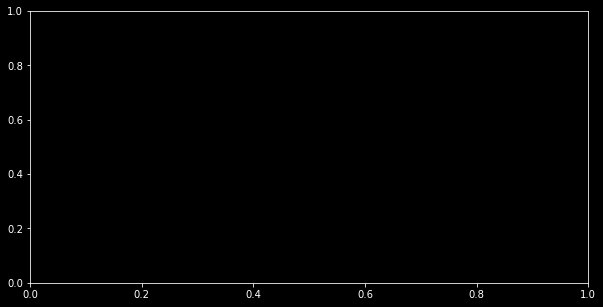

In [20]:
title = "Indian Restaurant Prices"
labels = ["Mia", "N.Y.", "S.F.", "Chi", "D.C.", "L.A."]
ticks = indian_dc['price'].sort_values().unique()  # the label locations
value = "Price Value in Dollars"
volume = "Amount of Restaurants"

width = 0.35  # the width of the bars

# x = indian_dc.groupby(['price', 'name'])['review_count'].max()
# y = indian_dc.groupby('price')['review_count']

fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(indian_dc.groupby(['price', 'review_count']),y)
ax.set_title(title, size=20)
ax.set_xlabel(value, size=10)
ax.set_ylabel(volume, size=10)
ax.set_xticks(ticks)

''

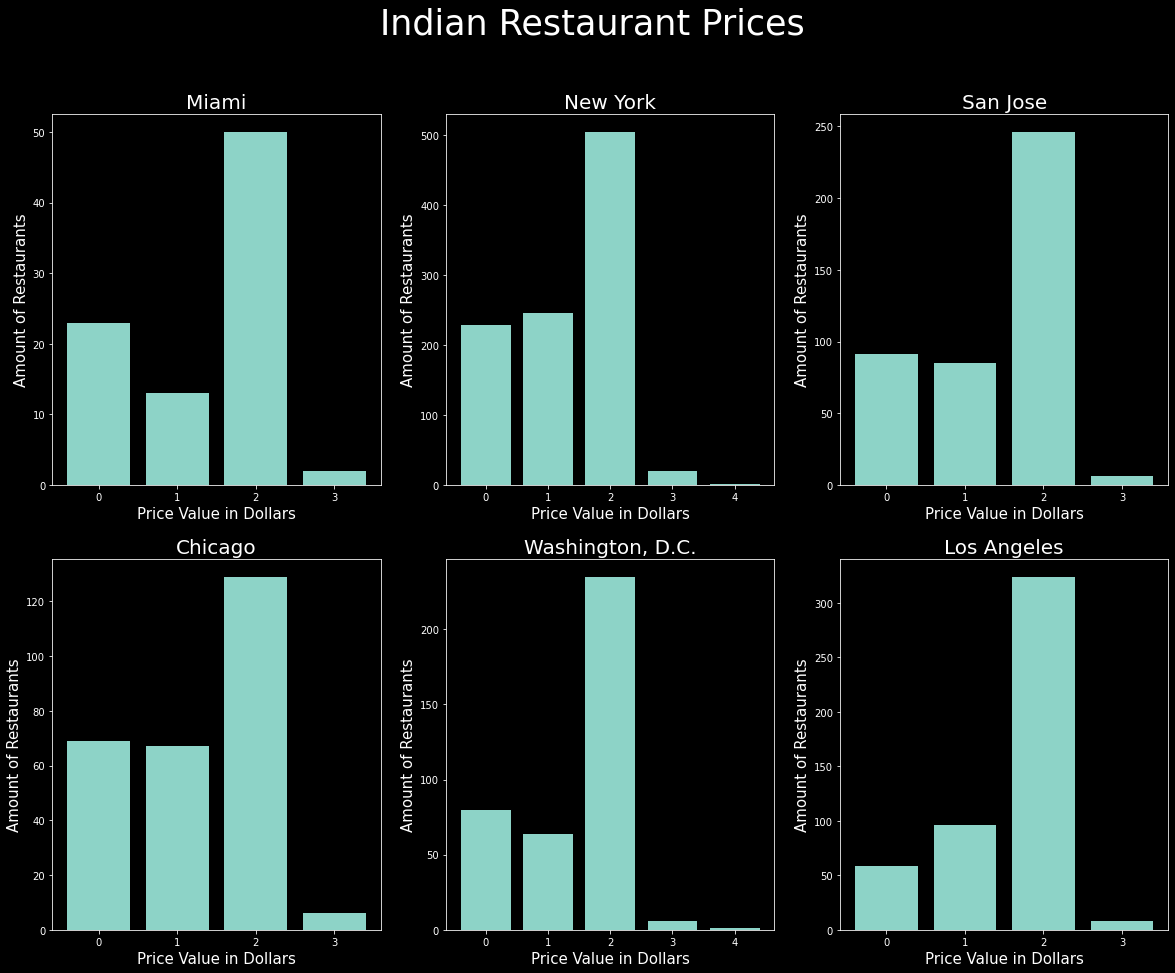

In [22]:
# INDIAN RESTAURANT PRICES

title = "Indian Restaurant Prices"
labels = ["Miami", "New York", "San Jose", "Chicago", "Washington, D.C.", "Los Angeles"]
value = "Price Value in Dollars"
volume = "Amount of Restaurants"
width = 0.35  # the width of the bars

# MULTI BAR CHART PLOTS
x_mia = list(indian_mia.groupby('price').count()['business_id'].index)
y_mia = list(indian_mia.groupby('price').count()['business_id'].values)
x_ny = list(indian_ny.groupby('price').count()['business_id'].index)
y_ny = list(indian_ny.groupby('price').count()['business_id'].values)
x_sj = list(indian_sj.groupby('price').count()['business_id'].index)
y_sj = list(indian_sj.groupby('price').count()['business_id'].values)
x_chi = list(indian_chi.groupby('price').count()['business_id'].index)
y_chi = list(indian_chi.groupby('price').count()['business_id'].values)
x_dc = list(indian_dc.groupby('price').count()['business_id'].index)
y_dc = list(indian_dc.groupby('price').count()['business_id'].values)
x_la = list(indian_la.groupby('price').count()['business_id'].index)
y_la = list(indian_la.groupby('price').count()['business_id'].values)


fig, axes = plt.subplots(figsize = (20, 15), ncols=3, nrows=2)
fig.suptitle(title, size = 35)

# TOP LEFT
axes[0,0].bar(x_mia, y_mia)
axes[0,0].set_title(labels[0], size=20)
axes[0,0].set_xlabel(value, size=15)
axes[0,0].set_ylabel(volume, size=15)
axes[0,0].set_xticks(indian_mia['price'].sort_values().unique())

# TOP MIDDLE
axes[0,1].bar(x_ny, y_ny)
axes[0,1].set_title(labels[1], size=20)
axes[0,1].set_xlabel(value, size=15)
axes[0,1].set_ylabel(volume, size=15)
axes[0,1].set_xticks(indian_ny['price'].sort_values().unique())

# TOP RIGHT
axes[0,2].bar(x_sj, y_sj)
axes[0,2].set_title(labels[2], size=20)
axes[0,2].set_xlabel(value, size=15)
axes[0,2].set_ylabel(volume, size=15)
axes[0,2].set_xticks(indian_sj['price'].sort_values().unique())

# BOTTOM LEFT
axes[1,0].bar(x_chi, y_chi)
axes[1,0].set_title(labels[3], size=20)
axes[1,0].set_xlabel(value, size=15)
axes[1,0].set_ylabel(volume, size=15)
axes[1,0].set_xticks(indian_chi['price'].sort_values().unique())

# BOTTOM MIDDLE
axes[1,1].bar(x_dc, y_dc)
axes[1,1].set_title(labels[4], size=20)
axes[1,1].set_xlabel(value, size=15)
axes[1,1].set_ylabel(volume, size=15)
axes[1,1].set_xticks(indian_dc['price'].sort_values().unique())

# BOTTOM RIGHT
axes[1,2].bar(x_la, y_la)
axes[1,2].set_title(labels[5], size=20)
axes[1,2].set_xlabel(value, size=15)
axes[1,2].set_ylabel(volume, size=15)
axes[1,2].set_xticks(indian_la['price'].sort_values().unique())
;

IndexError: too many indices for array

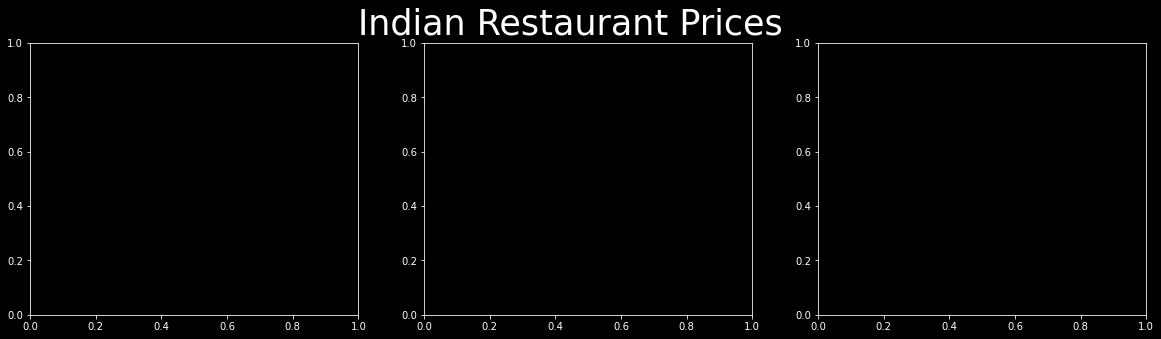

In [48]:
# REVIEW BASELINE DATA

title = "Indian Restaurant Prices"
labels = ["Chicago", "Washington, D.C.", "Los Angeles"]
value = "Price Value in Dollars"
volume = "Amount of Restaurants"
width = 0.35  # the width of the bars

# MULTI BAR CHART PLOTS
x_chi = list(indian_dc.groupby('price').get_group(3))
y_chi = indian_dc.groupby('price').get_group(3).count()['review_count']
x_dc = list(indian_dc.groupby('price').get_group(3).index)
y_dc = list(indian_dc.groupby('price').get_group(3).values)
x_la = list(indian_la.groupby('price').get_group(3).index)
y_la = list(indian_la.groupby('price').get_group(3).values)

fig, axes = plt.subplots(figsize = (20, 5), ncols=3, nrows=1)
fig.suptitle(title, size = 35)

# LEFT
axes[0,0].bar(x_chi, y_chi)
axes[0,0].set_title(labels[0], size=20)
axes[0,0].set_xlabel(value, size=15)
axes[0,0].set_ylabel(volume, size=15)
axes[0,0].set_xticks(indian_chi['price'].sort_values().unique())

# # MIDDLE
# axes[0,1].bar(x_dc, y_dc)
# axes[0,1].set_title(labels[1], size=20)
# axes[0,1].set_xlabel(value, size=15)
# axes[0,1].set_ylabel(volume, size=15)
# axes[0,1].set_xticks(indian_dc['price'].sort_values().unique())

# # RIGHT
# axes[0,2].bar(x_la, y_la)
# axes[0,2].set_title(labels[2], size=20)
# axes[0,2].set_xlabel(value, size=15)
# axes[0,2].set_ylabel(volume, size=15)
# axes[0,2].set_xticks(indian_la['price'].sort_values().unique())
;

In [30]:
list(indian_chi.groupby('price').count()['business_id'].index)

[0, 1, 2, 3]